# Decision Tree
- SVM처럼 Decision Tree는 **분류와 회귀 작업 그리고 다중출력 작업도 가능**한 다재다능한 머신러닝 알고리즘이다.
- 강력한 머신러닝 알고리즘 중 하나인 `Random Forest의 기본 구성 요소`이기도 하다.
- 결정 트리의 여러 장점 중 하나는 <span style='background:yellow'>**데이터 전처리가 거의 필요하지 않다**</span>는 것이다. feature 스케일을 맞추거나 평균을 원점에 맞추는 작업이 필요하지 않다. 

# Data load

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)#  criterion='entropy')
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

# 예측하기

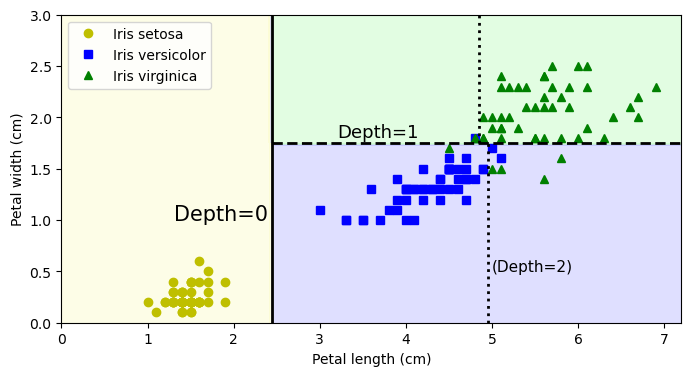

In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

# 추가 코드 - 세부 서식 지정
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

# 추가 코드 - 이 섹션에서는 그림 6-2를 아름답게 꾸미고 저장합니다.
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()
# save_fig("decision_tree_decision_boundaries_plot")

plt.show()

In [3]:
# help(sklearn.tree._tree.Tree)

# 클래스 확률 추정
* Decision Tree는 한 샘플이 특정 k에 속할 확률을 추정할 수 있다.<br>
-> 새로 발견한 붓꽃의 품종 분류
: 한 노드의 모든 샘플이 같은 클래스에 속해 있다면 이 노드를 순수(gini=0)하다고 한다.
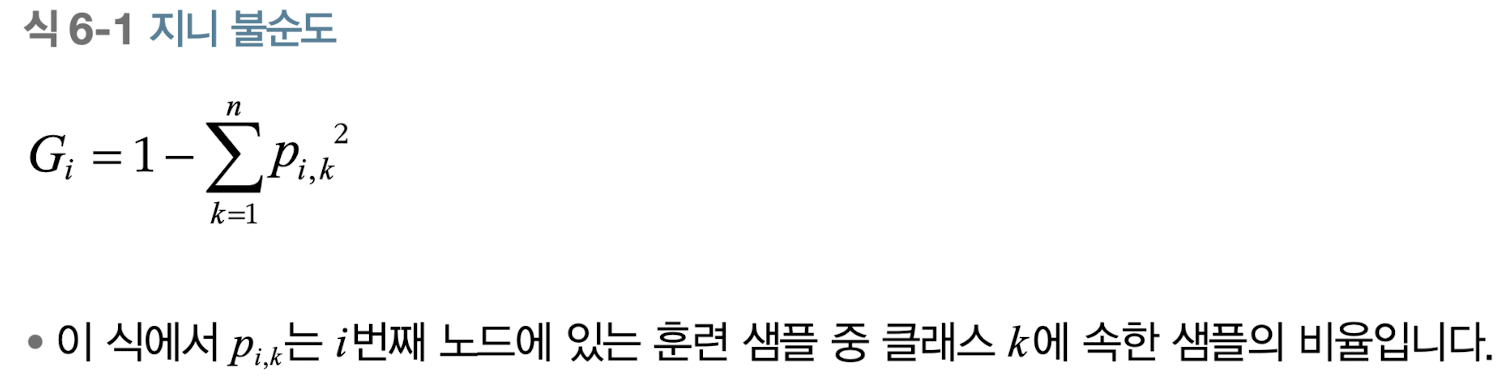

In [4]:
# 길이가 5cm이고 너비가 1.5cm인 꽃잎 분류
# print(tree_clf.predict_proba([[5, 1.5]]).round(3))
print(f"꽃잎은 {tree_clf.predict_proba([[5, 1.5]])[0][tree_clf.predict([[5, 1.5]])[0]].round(3)}의 확률로 {tree_clf.predict([[5, 1.5]])[0]}번 째 종류에 해당한다.")

꽃잎은 0.907의 확률로 1번 째 종류에 해당한다.


# CART 알고리즘 - Classification and Regression Tree
- skleran은 Tree를 훈련시키기 위새 CART 알고리즘을 사용한다.
- CART는 가장 순수한 서브셋으로 나눌 수 있는 (k, $t_k$)짝을 찾는 것이다.
- 알고리즘이 최소화해야 하는 비용함수는 아래와 같다.<br>
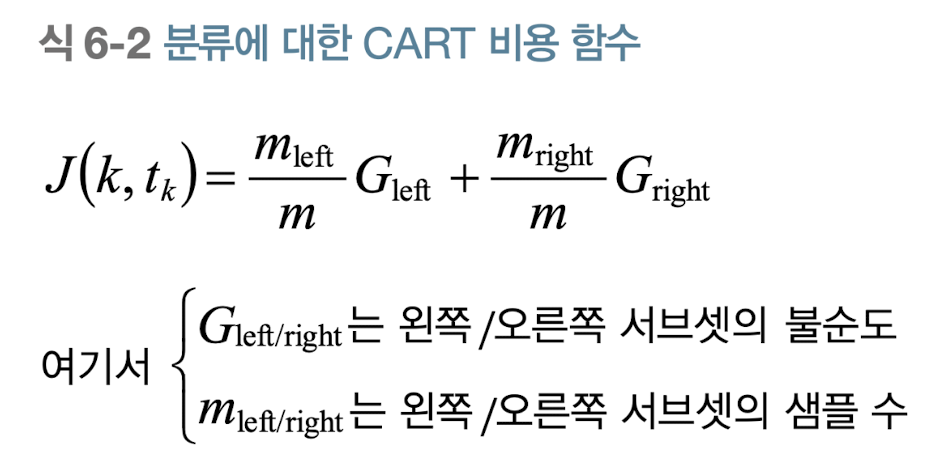

> CART알고리즘이 훈련셋을 둘로 잘 나누었다면 같은 방식으로 서브셋을 또 나누고 그 따음 서브셋을 또 나누는 방식을 반복한다.   
이 과정은 최대 깊이(`max_depth`)가 되거나 불순도를 줄이는 분할을 더이상 찾을 수 없을 때 중단한다.<br>
> - 중지 조건에 관여하는 매개변수: `min_samples_split`, `min_samples_leaf`, `min_weight_fraction_leaf`, `max_leaf_nodes`

## 계산 복잡도: ($O(log_2(m))$)
- 각 노드는 하나의 특성값만 확인하기 때문에 예측에 필요한 전체 복잡도 feature 수와 상관 없이 $O(log_2(m))$이다.
- 따라서 큰 훈련셋을 다룰 때도 **예측 속도가 매우 빠르다.**


# 엔트로피
- 기본적으로 gini 불순도가 사용되지만 `criterion='entropy'`로 하면 엔트로피 불순도를 사용할 수 있다.
- `DecisonTreeClassifier`의 criterion 매개변수의 기본값은 gini이고 `DecisionTreeRegression`의 기본값은 mse다.
- 어떤 세트 한 클래스의 샘플만 담고 있다면 엔트로피는 0이다. 노드가 점점 순수하게 분할되기 때문에 엔트로피가 감소되며 이진 로그를 사용하여 계산한다.<br>
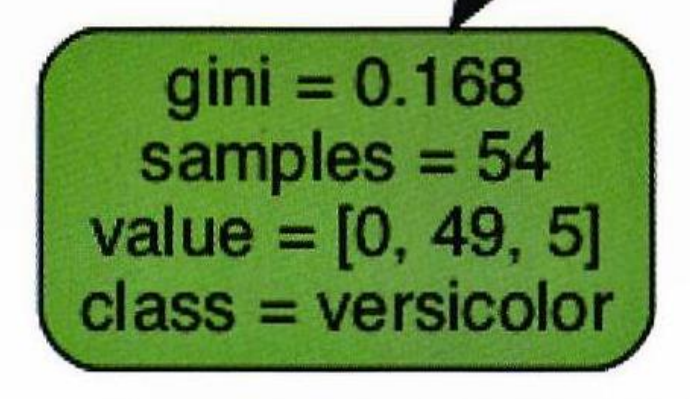<br>
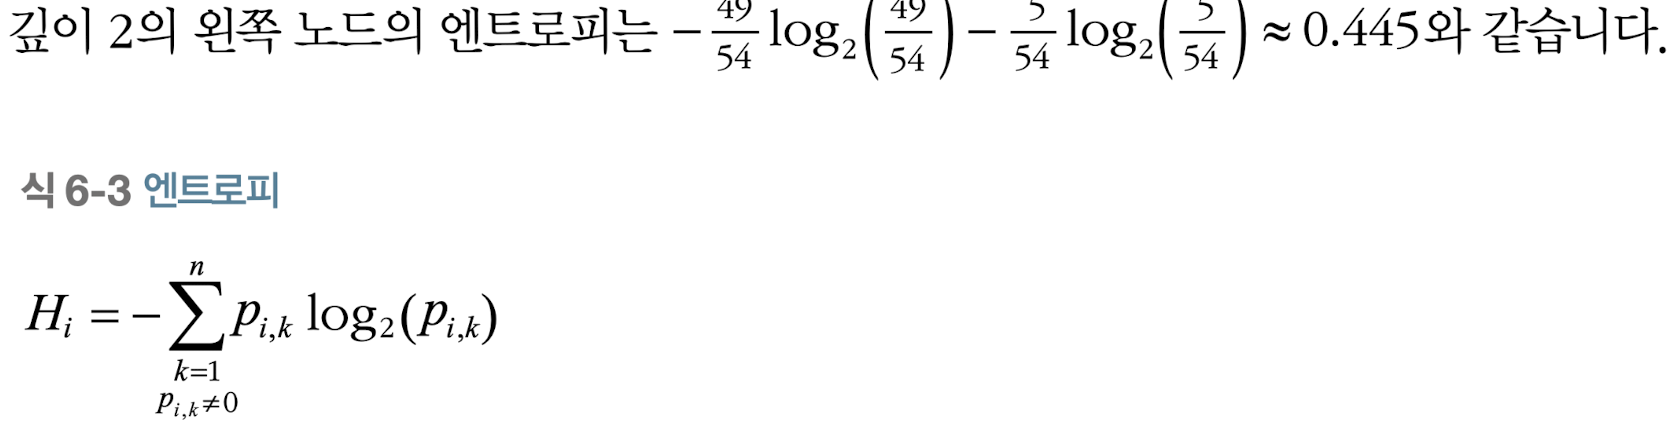

## Gini VS Entropy 무엇을 사용해야 할까?
: 실제로는 <span style='background:yellow'>큰 차이가 없다.</span> 즉, 둘 다 비슷한 트리가 만들어진다.   
다만, ***다른 트리가 만들어지는 경우***   
지니 불순고다 가장 빈도 높은 클래스를 한쪽 가지로 고립시키는 경향이 있는 반면 엔트로피는 조금 더 균형잡힌 트리를 만든다.

# 규제 매개변수
: 데이터가 선형일거라고 사정하는 선형 모델과 달리, 결정 트리는 훈련 데이터에 대한 제약이 거의 없다. 이렇게 훈련되기 전 파라미터 수가 경정되지 않는 모델을 **비파라미터 모델**이라고 한다.
- `Nonparametric Model`: **트리 모델**. 훈련 전에 파라미터 수가 결정되지 않는다. Overfitting을 피하기 위해 학습할 때 자유도를 제한(규제)할 필요가 있다.
- `Parametric Model` : **선형 모델**. 미리 정의된 모델 파라미터 수를 가지므로 자유도가 제한되고 Overfitting될 위험이 줄어든다.(but, Underfitting 위험은 증가)

## Decision Tree의 규제 매개변수
: `min_`으로 시작하는 매개변수를 증가시키거나 `max_`로 시작하는 매개변수를 감소 시키면 모델에 규제가 커진다.
- `min_samples_split`: 분할되기 위해 노드가 가져야 하는 최소 샘플 수
- `min_samples_leaf`: 리프 노드가 가져야 할 최소 샘플 수
- `min_weight_fraction_leaf`: `min_samples_leaf`와 같지만 가중치가 부여된 전체 샘플 수에서의 비율
- `max_depth`: 최대 깊이. 기본값은 None. 얘를 줄이면 Overfitting 방지
- `max_leaf_node`: 리프 노드의 최대 수
- `max_features`: 각 노드에서 분할에 사용할 특성의 최대 수   

> **$x^2$검정(카이제곱검정, 귀무가설)**
> : 규제 없이 결정 트리를 훈련시키고 불필요한 노드를 제거하는 알고리즘
> -  ***p-value*** : 이 검정의 확률. 어떤 임계값(Hyperparameter지만 통상 0.5)보다 높으면 그 순도 향상이 우연에 의한 것일 수 있다고 판단. 즉, 불필요한 노드로 판단하고 제거. 가지치기는 불피요한 노드가 모두 없어질 때까지 반복
> - 카이제곱 값이 커지지면 p-value는 줄어든다.

## moons data set에 훈련 시킨 2개의 Decision Tree 비교(규제 or not)
- 오른쪽의 `in_samples_leaf=5`로 규제를 가한 모델이 더 잘 일반화되었다.

In [62]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42) # 규제 X -> Overfitting
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42) # 규제 O -> 일반화 잘 된 모델
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

# 두 개 모델 예측 비교
def tree_pred(length, width):
    one = tree_clf1.predict([[length, width]])[0]
    two = tree_clf2.predict([[length, width]])[0]
    return f"규제X: Class {one}, 규제O: Class {two}"

tree_pred(5, 6)

'규제X: Class 1, 규제O: Class 1'

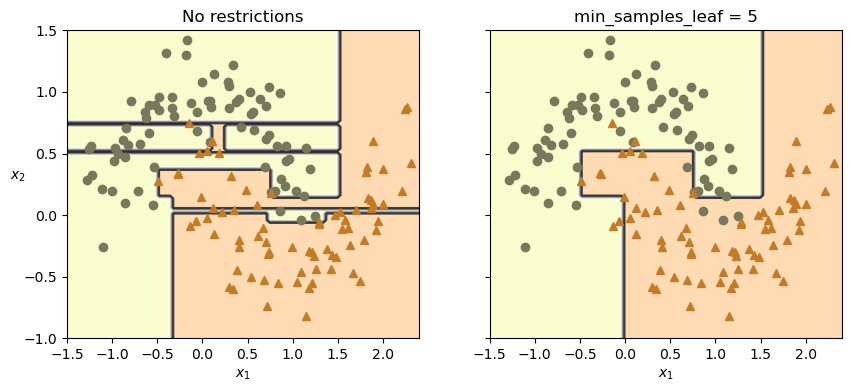

In [5]:
# 추가 코드 - 이 셀은 그림 6-3을 생성하고 저장합니다.

def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
# save_fig("min_samples_leaf_plot")
plt.show()

### 두 개의 모델 성능 비교

In [10]:
# 두 모델의 Socre 비교
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, 
                                       random_state=43)
res_x = tree_clf1.score(X_moons_test, y_moons_test) # 규제 X 모델
res = tree_clf2.score(X_moons_test, y_moons_test) # 규제 O 모델
print(f"규제 X 모델 예측 Score: {res_x} \n규제 O 모델 예측 Score: {res}")

규제 X 모델 예측 Score: 0.898 
규제 O 모델 예측 Score: 0.92


# Regression Tree
: 분류와 주요한 차이는 각 노드에서 클래스를 예측하는 대신 **어떤 값을 예측**한다는 것이다.
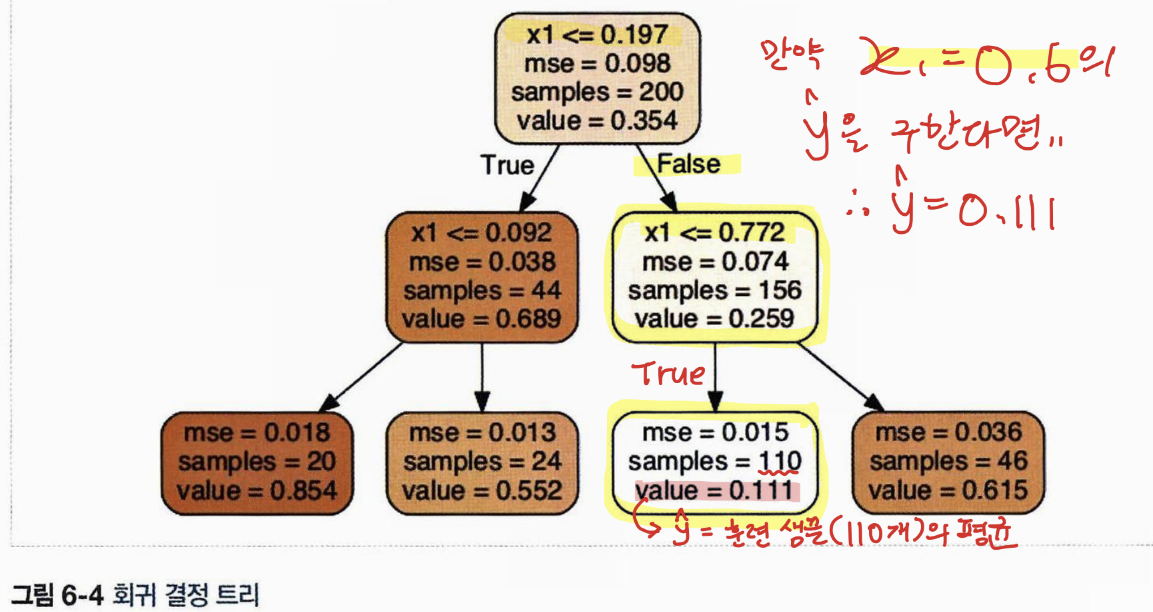

In [12]:
from sklearn.tree import DecisionTreeRegressor

# noise를 포함한 2차 함수 dataset 생성 
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # 간단한 랜덤한 입력 특성
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42) # depth=2
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42) # depth=3
tree_reg.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [51]:
# RegressionTree의 결정경계 비교
import pandas as pd

data1 = tree_reg.tree_.threshold
data2 = tree_reg2.tree_.threshold

df = pd.DataFrame(data=[data1, data2]).T
df.columns = ['depth=2', 'depth=3']
df

,depth=2,depth=3
0,-0.302651,-0.302651
1,-0.408304,-0.408304
2,-2.000000,-0.454161
3,-2.000000,-2.000000
4,0.271758,-2.000000
5,-2.000000,-0.370220
6,-2.000000,-2.000000
7,NaN,-2.000000
8,NaN,0.271758
9,NaN,-0.212704


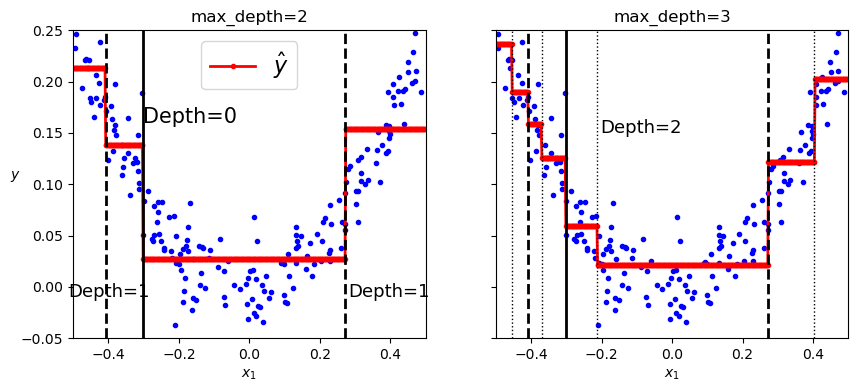

- 각 영역의 예측값은 항상 그 영역에 있는 타깃값의 평균이 된다.
- 알고리즘은 가능한 한 많은 샘플이 가까이 있도록 영역을 분할한다.


In [58]:
# 추가 코드 - 이 셀은 그림 6-5를 생성하고 저장합니다.

def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")


plt.show()
print('- 각 영역의 예측값은 항상 그 영역에 있는 타깃값의 평균이 된다.')
print('- 알고리즘은 가능한 한 많은 샘플이 가까이 있도록 영역을 분할한다.')

## 회귀의 CART 알고리즘
: 분류에서는 불순도를 최소화하는 방향을 분할했다. 회귀에서는 MSE를 최소화하도록 분할한다는 점만 다르다.
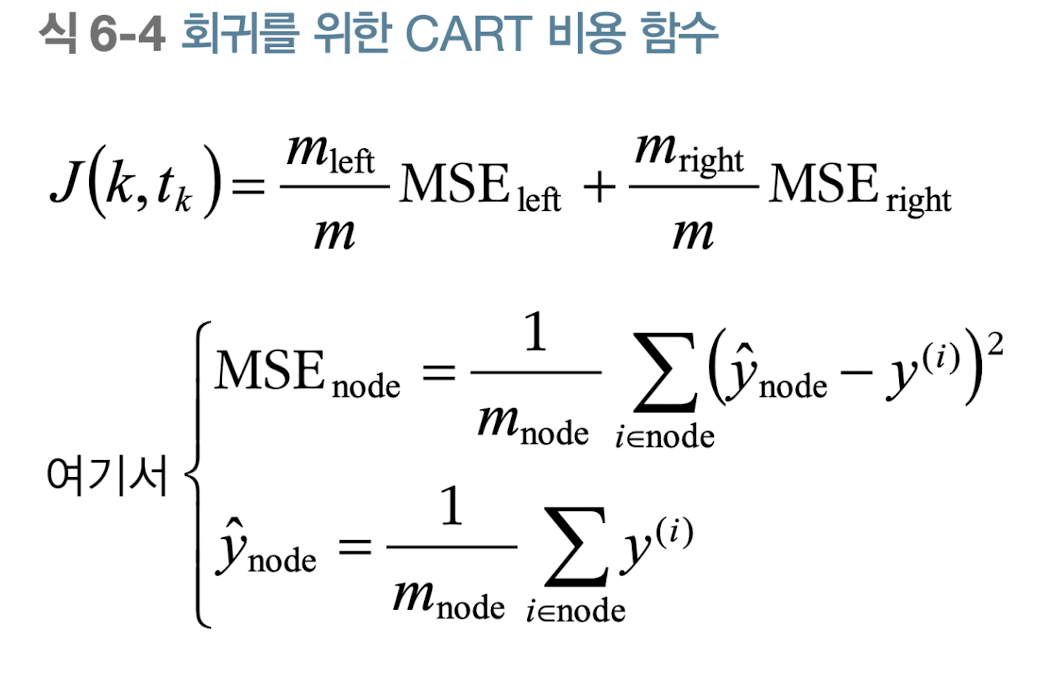
- 분류와 같이 회귀에선 규제를 하지 않는다면 결정 트리는 Overfitting되기 쉽다.
## 규제 X 모델 VS 규제 O 모델

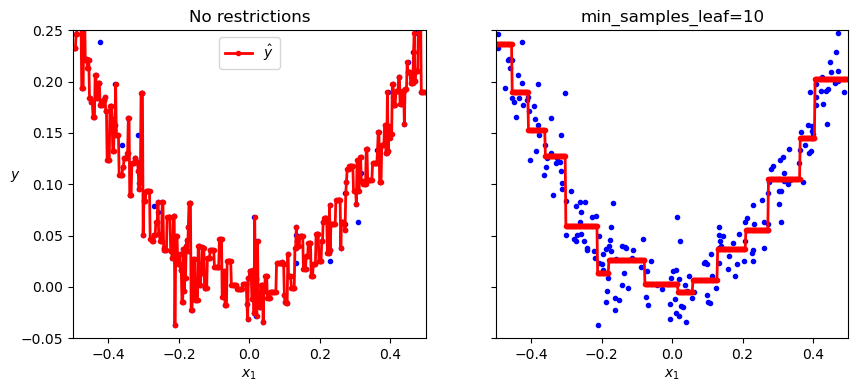

In [59]:
# 추가 코드 - 이 셀은 그림 6-6을 생성하고 저장합니다.

tree_reg1 = DecisionTreeRegressor(random_state=42) # 규제 X
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10) # 규제 O
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")

plt.show()

# 불안정성
: 결정 트리는 계단 모양의 결정 경계(모든 분할 축에 수직)를 만들기 때문에 **훈련 셋의 회전에 민감**하다.   이러한 문제를 해결하는 방법 중 하나는 **PCA 기법**을 사용하여 훈련 데이터를 더 좋은 방향으로 회전시키는 것이다. RandomForest를 사용하는 방법도 있다. RandomForest는 많은 트리에서 만든 예측을 평균하여 이러한 불안정성을 극복할 수 있다.
- 결정 트리의 주된 문제는 훈련 데이터에 작은 변화에도 매우 민감하다는 것이다.
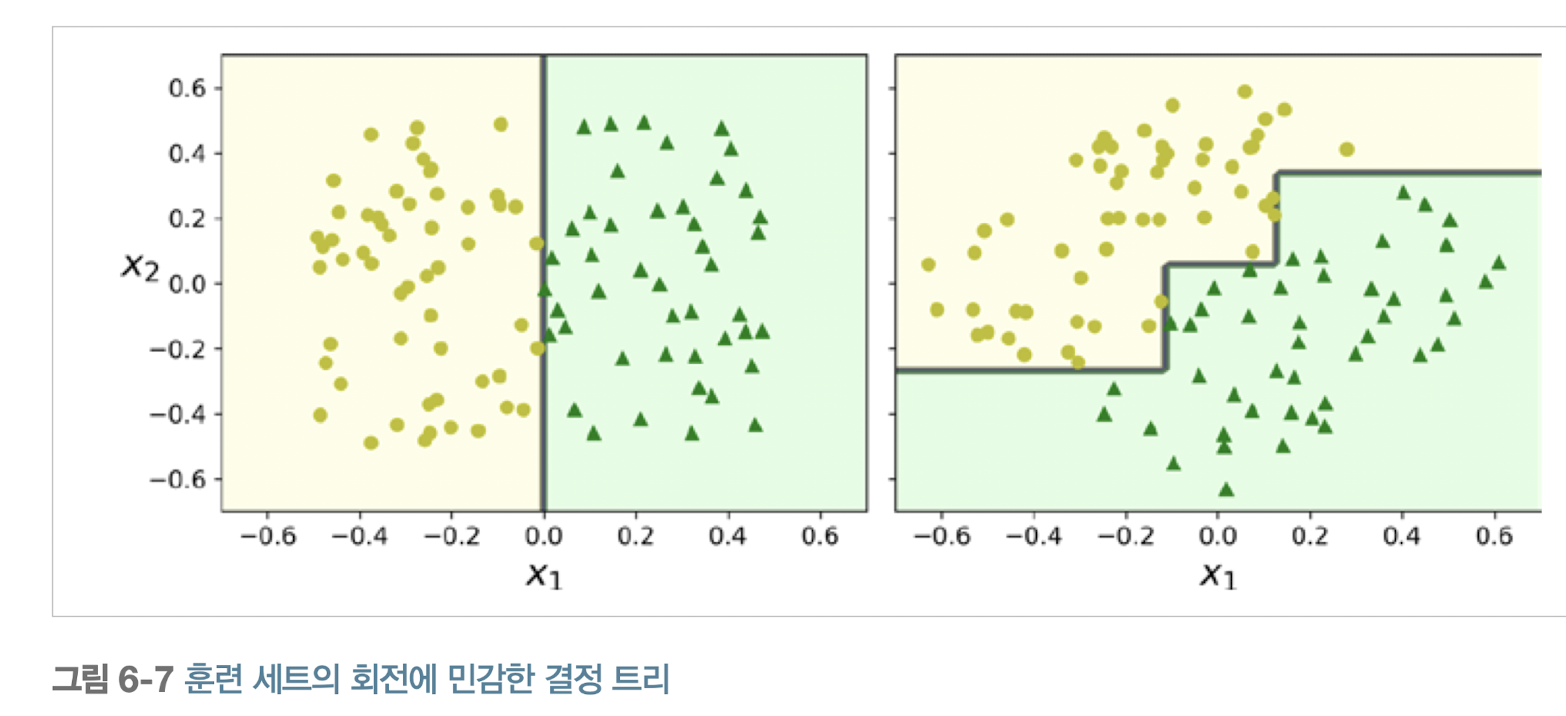

> sklearn에서 사용하는 훈련 알고리즘은 확률적이기 때문에 `random_state`변수를 지정하지 않으면 같은 training set에서도 다른 모델을 얻게 될 수 있다.

## PCA를 사용한 Decision Tree

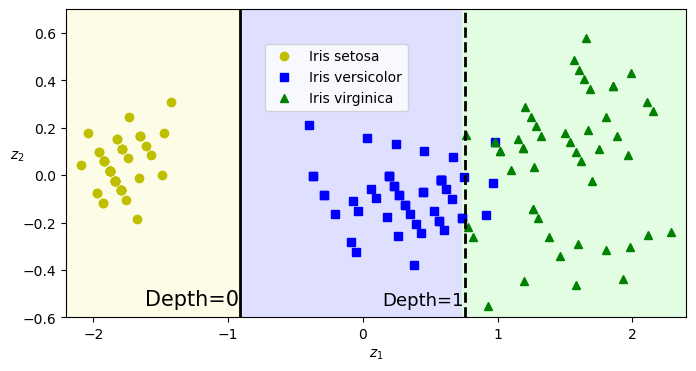

In [5]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

# 추가 코드 - 이 셀은 그림 6-8을 생성하고 저장합니다.

plt.figure(figsize=(8, 4))

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris_rotated[:, 0][y_iris == idx],
             X_iris_rotated[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]] # threshold 표시
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0",
         horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1",
         horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))

plt.show()

In [6]:
tree_clf_pca.tree_.threshold

array([-0.9111246 , -2.        ,  0.75787246, -2.        , -2.        ])

In [20]:
# pred
def tree_pred_pca(length, width):
    return f"꽃잎은 {tree_clf_pca.predict_proba([[length, width]])[0][tree_clf_pca.predict([[length, width]])[0]].round(3)}의 확률로 {tree_clf_pca.predict([[length, width]])[0]}번 째 종류에 해당한다."

tree_pred_pca(4, 8)



'꽃잎은 0.943의 확률로 2번 째 종류에 해당한다.'

# Plus, 트리 구조 엑세스

In [21]:
tree = tree_clf.tree_
tree

In [33]:
print(f"- 트리에 있는 총 노드 수: {tree.node_count}")
print(f"- 각 노드의 불순도 \n:{tree.impurity}")

# 루트 노드의 인덱스는 0
print(f"- 루트 노드의 자식 노드: {tree.children_left[0], tree.children_right[0]}")

# 왼쪽 노드와 오른쪽 노드가 같으면 이것이 리프 노드임을 의미합니다(자식 노드 ID는 임의적임):
print(f"- 왼쪽 노드와 오른쪽 노드가 같으면 이것이 리프 노드임: {tree.children_left[3], tree.children_right[3]}")

# 리프 노트 ID
is_leaf = (tree.children_left == tree.children_right)
print(f"\t-> 리프 노트 ID : {np.arange(tree.node_count)[is_leaf]}")

- 트리에 있는 총 노드 수: 5
- 각 노드의 불순도 
:[0.66666667 0.         0.5        0.16803841 0.04253308]
- 루트 노드의 자식 노드: (1, 2)
- 왼쪽 노드와 오른쪽 노드가 같으면 이것이 리프 노드임: (-1, -1)
	-> 리프 노트 ID : [1 3 4]


리프 노드가 아닌 노드를 _분할 노드_라고 합니다. 분할 특성은 `feature` 배열을 통해 참조할 수 있습니다. 리프 노드에 대한 값은 무시해야 합니다:

In [34]:
tree.feature

array([ 0, -2,  1, -2, -2], dtype=int64)

In [35]:
print(f"threshold: {tree.threshold}")

threshold: [ 2.44999999 -2.          1.75       -2.         -2.        ]
